In [1]:
#importing the modules
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import imshow
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, MaxPool2D
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

In [2]:
#loading the training dataset
dataset_train = pd.read_csv('../Sign-Language-to-Text-Conversion/Dataset/sign_mnist_train.csv')
dataset_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
#loading the test dataset
dataset_test = pd.read_csv('../Sign-Language-to-Text-Conversion/Dataset/sign_mnist_test.csv')
dataset_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [4]:
#Understanding the shape of data
print('Number of images in the training set: {}'.format(dataset_train.shape[0]))
print('Number of images in the test set: {}'.format(dataset_test.shape[0]))
d = int((dataset_train.shape[1] - 1)**0.5)
print('Shape of the images: {} x {}'.format(d,d))

Number of images in the training set: 27455
Number of images in the test set: 7172
Shape of the images: 28 x 28


In [5]:
#anaylising the labels in the dataset
labels = dataset_train['label']
labels_test = dataset_test['label']

In [6]:
labels

0         3
1         6
2         2
3         2
4        13
         ..
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64

In [7]:
labels_test

0        6
1        5
2       10
3        0
4        3
        ..
7167     1
7168    12
7169     2
7170     4
7171     2
Name: label, Length: 7172, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

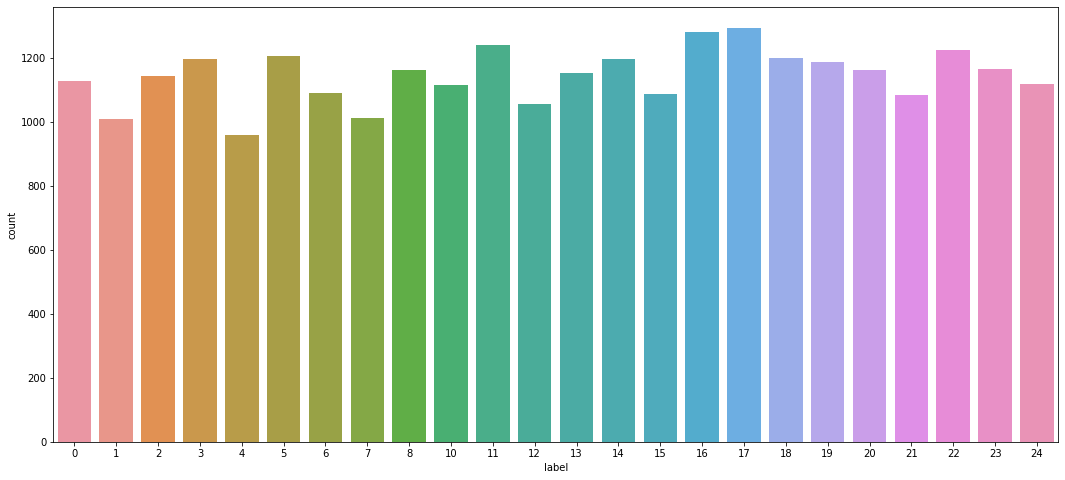

In [8]:
#plot the quantities in each class
plt.figure(figsize = (18,8))
sns.countplot(x =labels)

In [9]:
#dropping label from dataset so we only have pixel values
dataset_train.drop('label', axis = 1, inplace = True)
print(dataset_train.shape)
dataset_test.drop('label', axis = 1, inplace = True)
print(dataset_test.shape)

(27455, 784)
(7172, 784)


In [10]:
x_train = dataset_train.values.reshape(dataset_train.shape[0],28,28,1)
x_test = dataset_test.values.reshape(dataset_test.shape[0],28,28,1)

In [11]:
#Normalising the data
x_train = x_train / 255.0
x_test = x_test / 255.0
print(x_train.shape)
print(x_test.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


3


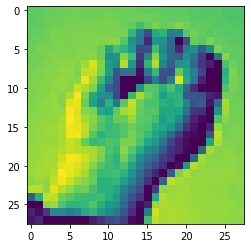

In [12]:
#image inspection
index = 8
print(labels[index])
plt.imshow(x_train[100].reshape(28,28))

2


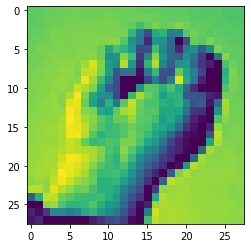

In [13]:
index = 3
print(labels[index])
plt.imshow(x_train[100].reshape(28,28))

In [14]:
#Putting labels into different categories from 0-24
labels = to_categorical(labels)
y_train=labels
print(labels.shape)
labels_test = to_categorical(labels_test)
y_test=labels_test
print(labels_test.shape)

(27455, 25)
(7172, 25)


In [15]:
#defining the model
model = Sequential()
model.add(Conv2D(100 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.25))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(units = 300 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(units = 25 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 100)       1000      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 75)        67575     
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 25)        16900     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 25)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 7, 25)          1

In [16]:
#Training the model
history = model.fit(x_train, y_train,
          batch_size=100,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
275/275 [==============================] - 78s 281ms/step - loss: 1.3213 - accuracy: 0.6219 - val_loss: 2.3212 - val_accuracy: 0.4532
Epoch 2/20
275/275 [==============================] - 74s 270ms/step - loss: 0.1600 - accuracy: 0.9692 - val_loss: 0.5744 - val_accuracy: 0.9080
Epoch 3/20
275/275 [==============================] - 74s 270ms/step - loss: 0.0513 - accuracy: 0.9927 - val_loss: 0.2617 - val_accuracy: 0.9232
Epoch 4/20
275/275 [==============================] - 76s 278ms/step - loss: 0.0238 - accuracy: 0.9980 - val_loss: 0.1503 - val_accuracy: 0.9557
Epoch 5/20
275/275 [==============================] - 78s 285ms/step - loss: 0.0166 - accuracy: 0.9985 - val_loss: 0.1769 - val_accuracy: 0.9483
Epoch 6/20
275/275 [==============================] - 77s 280ms/step - loss: 0.0109 - accuracy: 0.9992 - val_loss: 0.1461 - val_accuracy: 0.9573
Epoch 7/20
275/275 [==============================] - 75s 271ms/step - loss: 0.0088 - accuracy: 0.9993 - val_loss: 0.1459 - val_ac

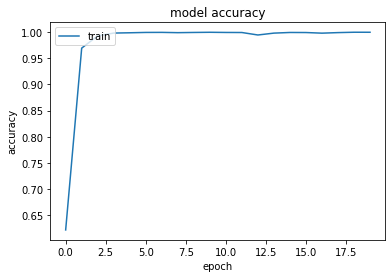

In [17]:
#Seeing the growth in accuracy
plt.plot(history.history['accuracy'])
plt.title("model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

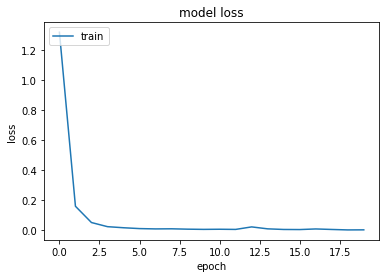

In [18]:
#Seeing the decline in loss
plt.plot(history.history['loss'])
plt.title("model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')

plt.show()

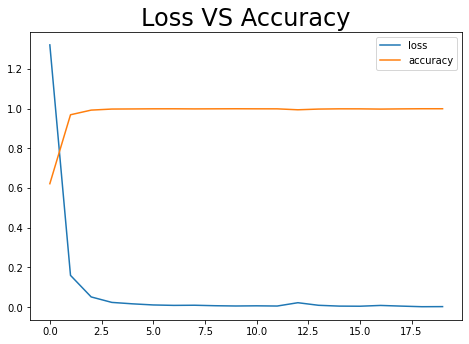

In [19]:
#Comparing both the above progress
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_title('Loss VS Accuracy',fontsize=24)
ax.plot(history.history['loss'], label = 'loss')
ax.plot(history.history['accuracy'], label = 'accuracy')
ax.legend()

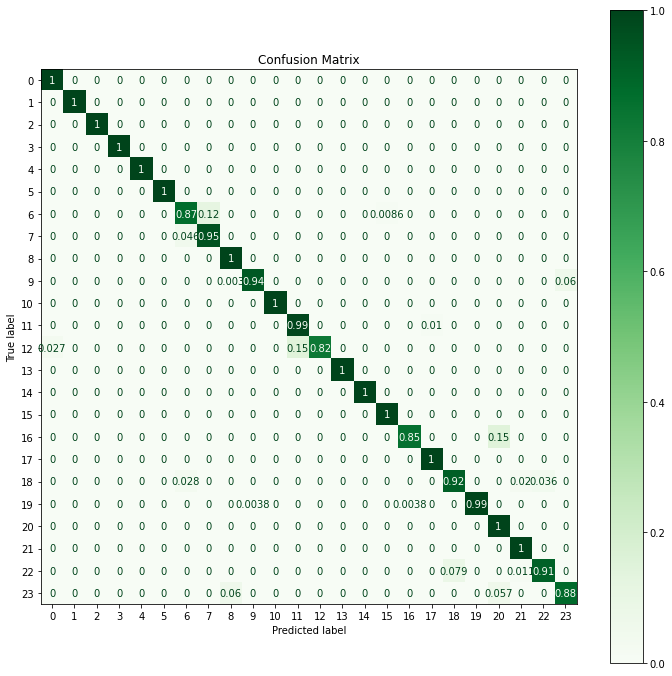

In [20]:
# plot the Confusion Matrix
y_pred=model.predict(x_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
fig, ax = plt.subplots(figsize=(12, 12))
cm = confusion_matrix(y_test,y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(ax=ax,cmap=plt.cm.Greens)
ax.set_title("Confusion Matrix")
plt.show()

In [21]:
#Generating the final report for the model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       331
           1       1.00      1.00      1.00       432
           2       1.00      1.00      1.00       310
           3       1.00      1.00      1.00       245
           4       1.00      1.00      1.00       498
           5       1.00      1.00      1.00       247
           6       0.92      0.87      0.90       348
           7       0.91      0.95      0.93       436
           8       0.93      1.00      0.96       288
          10       1.00      0.94      0.97       331
          11       1.00      1.00      1.00       209
          12       0.90      0.99      0.94       394
          13       1.00      0.82      0.90       291
          14       1.00      1.00      1.00       246
          15       1.00      1.00      1.00       347
          16       0.98      1.00      0.99       164
          17       0.99      0.85      0.92       144
          18       0.98    